Генерация данных для РГР по статистической обработке данных

In [3]:
from scipy import mean, std
from scipy.stats import norm, chisquare, chisqprob, chi2, t, f, pearsonr
from matplotlib.pyplot import *
import seaborn as sb
from math import *
from random import gauss, random, randint, choice
import sys

import pandas as pd
from IPython.display import display, HTML

# показывать графики в яйчейке вывода, а не в отдельном окне
%matplotlib inline  



In [4]:
# Данные для примера

X = [4.4, 4.1, 5.1, 4.8, 4.9, 5.1, 4.7, 4.1, 6.7, 3.3, 5.3, 5.7, 3.0, 2.3, 4.7, 6.1, 3.9, 3.3, 5.1, 4.4, 4.3, 5.9, 5.2, 4.0, 4.9, 4.8, 3.6, 4.6, 4.5, 5.3, 2.3, 2.5, 3.8, 5.0, 4.0, 5.5, 3.2, 4.3, 2.5, 3.5, 3.5, 3.9, 4.1, 4.3, 4.3, 5.0, 3.8, 6.1, 4.6, 4.6, 4.3, 5.9, 5.2, 7.2, 4.3, 3.4, 5.1, 4.4, 6.3, 3.9, 4.5, 3.6, 2.8, 5.5, 5.3, 4.8, 3.7, 4.2, 4.8, 5.5, 3.9, 5.2, 4.6, 4.0, 4.3, 3.9, 4.6, 4.6, 6.2, 3.3, 3.9, 4.1, 3.9, 4.7, 6.5, 4.9, 4.9, 7.2, 5.8, 4.7, 4.9, 5.7, 4.9, 4.0, 3.7, 3.8, 4.2, 4.3, 5.0, 3.4]
Y = [10.1, 10.7, 7.1, 7.8, 10.7, 9.5, 11.9, 13.9, 9.1, 8.0, 9.6, 9.7, 5.5, 3.9, 13.1, 6.9, 10.1, 3.9, 8.3, 4.9, 11.4, 10.9, 10.1, 6.7, 10.8, 7.7, 5.7, 9.1, 9.3, 7.0, 7.1, 13.0, 13.5, 11.1, 10.4, 10.6, 11.2, 9.0, 2.8, 10.4, 11.4, 12.8, 9.8, 11.7, 11.3, 11.5, 10.7, 7.9, 14.2, 12.4, 8.4, 10.7, 11.9, 9.1, 11.6, 13.3, 3.3, 10.6, 5.6, 8.0, 13.9, 6.2, 10.7, 8.0, 14.1, 12.2, 10.1, 8.5, 10.9, 11.9, 4.5, 9.8, 6.1, 12.1, 14.4, 7.4, 8.4, 12.1, 5.5, 9.4, 10.0, 13.1, 10.4, 12.6, 11.0, 10.9, 7.6, 11.4, 9.5, 10.3, 7.1, 8.3, 9.3, 9.9, 16.8, 7.3, 9.5, 12.3, 6.3, 12.0]
# X = [gauss(0,1) for i in range(0,1000)]
XY = pd.DataFrame({'X': X, 'Y': Y})
alpha = 0.01
N = len(X)
Ny = len(Y)

In [5]:
# функции определяющие и выводящие на экран числовые характеристики

def describe(X, alpha):
    m = mean(X)
    sd = std(X, ddof=1)
    delta = t.isf(alpha, len(X)-2)* sd / sqrt(len(X))
    _x_ = m - delta, m + delta
    return m, sd, _x_


def describe2(X,Y, alpha=0.01, show=False):
    n,m = len(X), len(Y)
    mx, sdx, _x_ = describe(X, alpha)
    my, sdy, _y_ = describe(Y, alpha)
    fn = max(sdx, sdy)/min(sdx, sdy)
    fk = f.isf(alpha/2, n-1, m-1)
    tk = t.isf(alpha/2, len(X)+len(Y)-2)
    tn = (mx - my) / sqrt( (sdx**2 * (n-1) + sdy**2 * (m-1)) ) * sqrt( (n*m* (n+m-2))/(n+m) )
    r,p = pearsonr(X,Y)
    if show:
        print("           X       Y")
        print("Средние: {0:3.2f}    {1:3.2f}".format(mx,my))
        print("ст.откл: {0:3.2f}    {1:3.2f}".format(sdx,sdy))
        print("{2:.0f}-процентный доверительный интервал X: ( {0:3.2f}, {1:3.2f} )".format(_x_[0], _x_[1], 100-alpha*100))
        print("{2:.0f}-процентный доверительный интервал Y: ( {0:3.2f}, {1:3.2f} )".format(_y_[0], _y_[1], 100-alpha*100))
        print("Гипотеза о равенстве дисперсий: "+("принимается" if -fk <= fn <= fk else "отклоняется") + 
              " ( fn = {0:3.2f}; fk = ±{1:3.2f} )".format(fn, fk))
        print("Гипотеза о равенстве средних: " + ("принимается" if -tk <= tn <= tk else "отклоняется") + 
              " ( tn = {0:3.2f}; tk = ±{1:3.2f} )".format(tn, tk))
        print("Коэффициент корреляции Пирсона r = {0:.2f} ".format(r) + ("значим" if (p<alpha) else "не значим") 
              + " (p-value = {0:.6}).".format(p))
    return tk,tn,-tk <= tn <= tk, r,p
    
# вычислим числовые характеристики
Mx = mean(X)
sd = std(X, ddof=1)
mu3 = mean(list(map(lambda x: ((x-Mx)/sd)**3, X)))
Sk = mu3/sd**3  # коэффициент ассиметрии
mu4 = mean( list(map(lambda x: (x-Mx)**4, X)))
Ku = mu4/sd**4 - 3
print("Объём выборки: %i"% len(X))
print("Числовые характеристики:")
print("Mean: %2.3f"%Mx)
print("std : %2.3f"%sd)
print("mu3: %2.3f"%mu3)
print("mu4: %2.3f"%mu4)
print("Skewness: %2.3f"%Sk)
print("Kurtosis: %2.3f"%Ku)
print("Max: %2.3f" % max(X))
print("Min: %2.3f" % min(X))


describe2(X,Y, alpha, True)

Объём выборки: 100
Числовые характеристики:
Mean: 4.527
std : 0.982
mu3: 0.255
mu4: 3.056
Skewness: 0.269
Kurtosis: 0.283
Max: 7.200
Min: 2.300
           X       Y
Средние: 4.53    9.70
ст.откл: 0.98    2.70
99-процентный доверительный интервал X: ( 4.29, 4.76 )
99-процентный доверительный интервал Y: ( 9.07, 10.34 )
Гипотеза о равенстве дисперсий: отклоняется ( fn = 2.75; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -18.02; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.03 не значим (p-value = 0.752481).


(2.6008872779626229,
 -18.016515552829787,
 False,
 0.031930313068059789,
 0.75248140414801346)

h: 0.30


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
intervals,2.1497,2.4503,2.7510,3.0516,3.3523,3.6529,3.9535,4.2542,4.5548,4.8555,5.1561,5.4568,5.7574,6.0580,6.3587,6.6593,6.9600,7.2606
Z-intervals,-2.4203,-2.1142,-1.8081,-1.5020,-1.1960,-0.8899,-0.5838,-0.2777,0.0283,0.3344,0.6405,0.9466,1.2526,1.5587,1.8648,2.1709,2.4769,2.7830
Pi,NaN,0.0095,0.0180,0.0312,0.0493,0.0709,0.0929,0.1109,0.1207,0.1197,0.1081,0.0890,0.0668,0.0456,0.0284,0.0161,0.0083,0.0039
freq,NaN,2.0000,2.0000,2.0000,4.0000,6.0000,12.0000,10.0000,13.0000,14.0000,13.0000,6.0000,5.0000,3.0000,4.0000,1.0000,1.0000,2.0000
freq_t,NaN,0.9495,1.8044,3.1249,4.9311,7.0907,9.2910,11.0933,12.0697,11.9663,10.8107,8.8998,6.6763,4.5637,2.8427,1.6135,0.8345,0.3933


рассмотрим нулевую гипотезу  H0: генеральная совокупность имеет нормальное распределениес уровнем значимости alpha = 0.0100
Значение параметра Хи-квадрат: 12.89
значение p-value без учёта числа параметров (2) исходного распределения (нормального). 
Числой степеней свободы 18 - 1 = 17, где 18 - число участков
chi2, p-value: 12.89, 0.6806,
p-value (вычисленное для степеней свободы 18 - 1 - 2 = 15): 0.5350
Критическое значение chi2 для принятого уровня значимости (определено по таблице для df=15, alpha=0.01): 30.578
Наблюдаемое значение chi2 = 12.893 меньше кртитичекого 30.578 - нулевая гипотеза ПРИНИМАЕТСЯ


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.


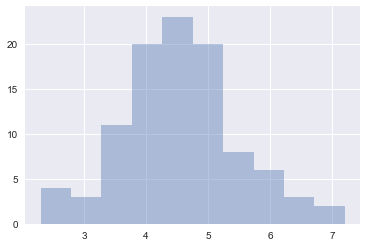

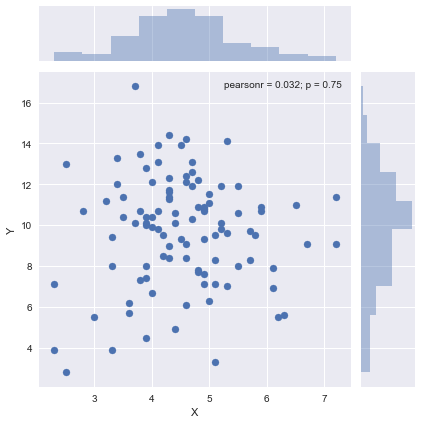

In [6]:
# Зададим уровень значимости alpha - вероятность отклонить верную гипотезу
alpha = 0.01
# построим интервальный ряд
# вычислим шаг для интервала
h = ( max(X) - min(X) ) / (1 + 3.322 * log(len(X)))
# опеределим левую границу первого интервала
_x = min(X) - h/2
print("h: %3.2f"%h)
# определим интервалы
Xint = [_x]
while (Xint[-1] < max(X)): 
    Xint += [Xint[-1]+h]
    
XInt = [(_x,x_) for _x,x_ in zip(Xint[:-1],Xint[1:])]

# Составим таблицу частот
Ni = []
for xi in Xint[1:]:
    Ni +=[0]
    for x in X:
        if xi-h < x <= xi: Ni[-1]+=1
Zint = list(map(lambda x: (x-Mx)/sd, Xint))
Pi = [norm.cdf(z_ if z_ >= min(Zint) else -10) - norm.cdf(_z if _z <= max(Zint) else 10) for _z,z_ in zip(Zint[:-1],Zint[1:])]
Ni_t = list(map(lambda x: x*N, Pi))
# chi2_ = sum( (ni - pi * len(Pi))**2 / (len(Pi)*pi) for ni,pi in zip(Ni,Pi))
# добавим [None] ибо значений ниже границы первого интервала нет, поэтому строка пустая
data = pd.DataFrame({'intervals': Xint, 'Z-intervals': Zint, 'freq': [None]+Ni, 'freq_t': [None]+Ni_t, 'Pi':[None]+Pi })
pd.set_option('precision',4)
display(data[['intervals', 'Z-intervals', 'Pi', 'freq', 'freq_t']].transpose())
s = len(data.freq)
sb.distplot(X, kde = False)
# show()

# Проверим значения критерия хи-квадрат при разном числе интервалов. Существует рекомендация, 
# объединять интервалы так чтобы в них было как минимум по 10 значений
print("рассмотрим нулевую гипотезу  H0: генеральная совокупность имеет нормальное распределение" \
"с уровнем значимости alpha = %2.4f" % alpha)
chi2_ = sum( (fe-ft)**2/ft for fe, ft in zip(data.freq[1:], data.freq_t[1:]))
chi2_c = chi2.isf(q=alpha,df=s-3)  # критическое значение параметра хи-квадрат. (максимальное отклонение для заданного alpha)
print("Значение параметра Хи-квадрат: %2.2f" % chi2_)
pval = chisquare(data.freq[1:], data.freq_t[1:])
print("""значение p-value без учёта числа параметров (2) исходного распределения (нормального). 
Числой степеней свободы %i - 1 = %i, где %i - число участков""" % (s,s-1,s) )
print("chi2, p-value: %2.2f, %2.4f," % pval)
pval = chisqprob(chi2_, len(data.freq[1:])  - 2 - 1)
print("p-value (вычисленное для степеней свободы %i - 1 - 2 = %i): %2.4f" % (s,s-3,pval))
print("Критическое значение chi2 для принятого уровня значимости (определено по таблице для df=%i, alpha=0.01): %2.3f" \
      % (s-3, chi2_c))
r = chi2_ < chi2_c
print("Наблюдаемое значение chi2 = %2.3f " % chi2_ + ("меньше" if r else "больше") + \
      " кртитичекого %2.3f - нулевая гипотеза "%chi2_c+("ПРИНИМАЕТСЯ" if r else "ОТКЛОНЯЕТСЯ"))
# Проверить гипотезу можно ещё и сравнив вычисленное p-value и уровень значимости alpha 
# (из которого как раз и определяется критическое значение chi2)
# Если полуенное p-value < alpha то нулевая гипотеза отклоняется.

sb.jointplot(x='X',y='Y', data=XY)

show()


Генерируется выборка из нормального распределения с mu = 13.2, 13.9; sigma = 1.5
вариант 1     ----------------------------------------
           X       Y
Средние: 13.29    13.56
ст.откл: 1.38    1.43
99-процентный доверительный интервал X: ( 12.97, 13.62 )
99-процентный доверительный интервал Y: ( 13.22, 13.89 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = -1.33; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.30 значим (p-value = 0.00275707).


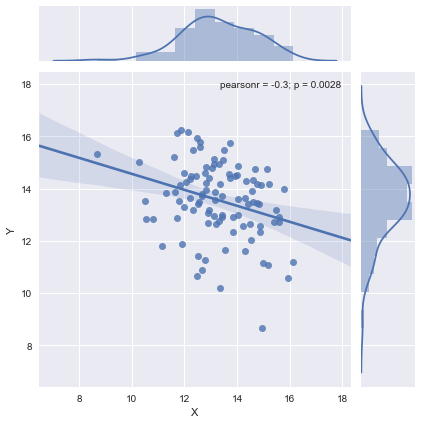

Генерируется выборка из нормального распределения с mu = 13.4, 14.2; sigma = 4.4
вариант 2     ----------------------------------------
           X       Y
Средние: 12.96    14.00
ст.откл: 4.51    4.50
99-процентный доверительный интервал X: ( 11.90, 14.03 )
99-процентный доверительный интервал Y: ( 12.93, 15.06 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.00; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = -1.62; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.54 значим (p-value = 5.90821e-09).


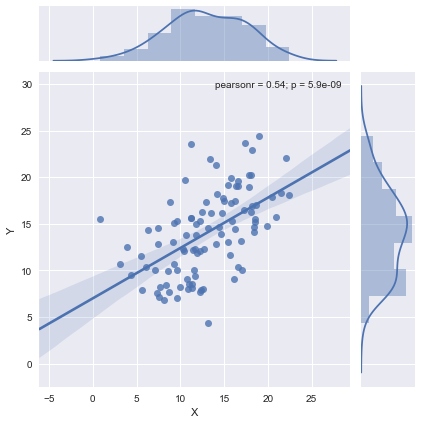

Генерируется выборка из нормального распределения с mu = 10.4, 8.0; sigma = 4.5
вариант 3     ----------------------------------------
           X       Y
Средние: 10.46    7.77
ст.откл: 4.90    4.09
99-процентный доверительный интервал X: ( 9.30, 11.61 )
99-процентный доверительный интервал Y: ( 6.80, 8.73 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.20; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 4.22; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.18 не значим (p-value = 0.0720185).


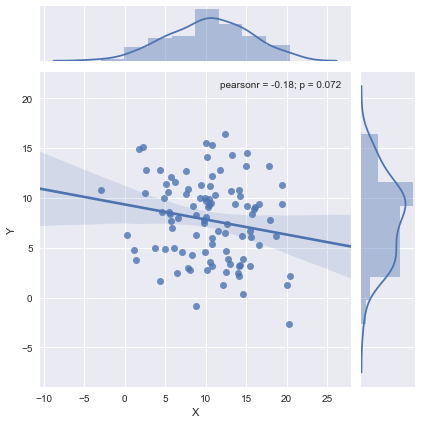

Генерируется выборка из нормального распределения с mu = 14.4, 15.5; sigma = 1.9
вариант 4     ----------------------------------------
           X       Y
Средние: 14.43    15.58
ст.откл: 1.89    1.81
99-процентный доверительный интервал X: ( 13.98, 14.88 )
99-процентный доверительный интервал Y: ( 15.15, 16.01 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.04; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -4.38; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.35 значим (p-value = 0.00040588).


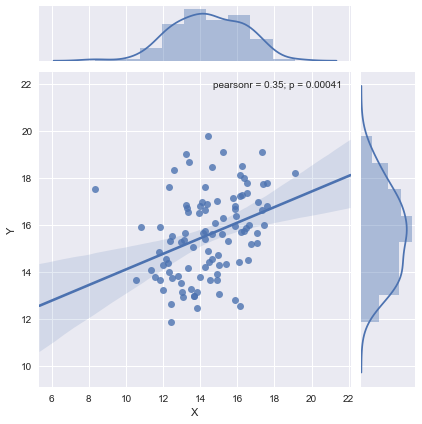

Генерируется выборка из нормального распределения с mu = 12.3, 12.7; sigma = 5.5
вариант 5     ----------------------------------------
           X       Y
Средние: 11.94    13.04
ст.откл: 4.64    5.39
99-процентный доверительный интервал X: ( 10.84, 13.04 )
99-процентный доверительный интервал Y: ( 11.76, 14.31 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.16; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = -1.54; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.50 значим (p-value = 8.45752e-08).


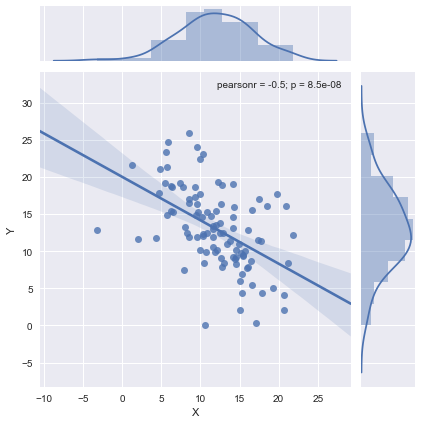

Генерируется выборка из нормального распределения с mu = 14.6, 13.3; sigma = 5.4
вариант 6     ----------------------------------------
           X       Y
Средние: 14.08    13.44
ст.откл: 5.50    5.32
99-процентный доверительный интервал X: ( 12.78, 15.38 )
99-процентный доверительный интервал Y: ( 12.18, 14.70 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = 0.84; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.26 значим (p-value = 0.00817201).


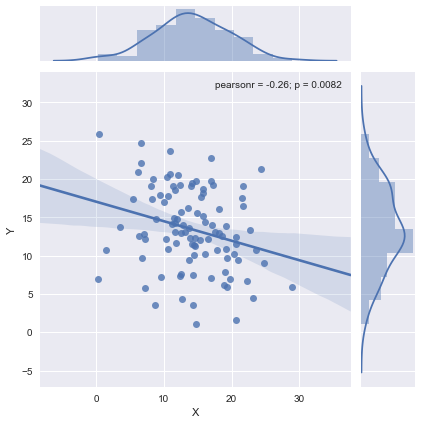

Генерируется выборка из нормального распределения с mu = 15.8, 10.2; sigma = 1.7
вариант 7     ----------------------------------------
           X       Y
Средние: 15.77    10.35
ст.откл: 1.47    1.48
99-процентный доверительный интервал X: ( 15.42, 16.12 )
99-процентный доверительный интервал Y: ( 10.00, 10.69 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.00; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 26.01; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.31 значим (p-value = 0.00177199).


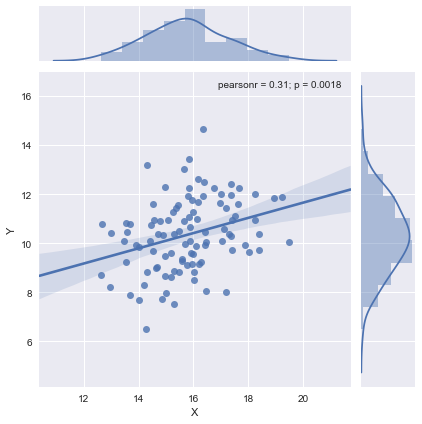

Генерируется выборка из нормального распределения с mu = 12.4, 15.5; sigma = 1.9
вариант 8     ----------------------------------------
           X       Y
Средние: 12.29    15.54
ст.откл: 1.93    1.71
99-процентный доверительный интервал X: ( 11.83, 12.74 )
99-процентный доверительный интервал Y: ( 15.14, 15.94 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.13; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -12.61; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.60 значим (p-value = 4.31019e-11).


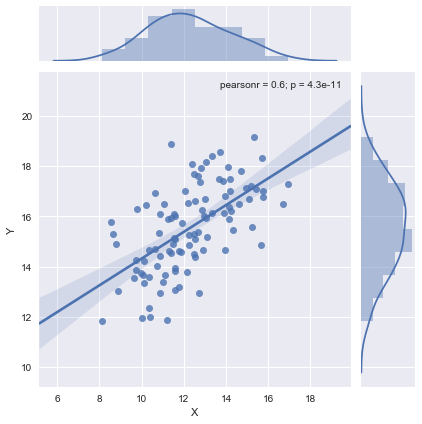

Генерируется выборка из нормального распределения с mu = 14.7, 14.3; sigma = 1.0
вариант 9     ----------------------------------------
           X       Y
Средние: 14.74    14.20
ст.откл: 1.12    1.08
99-процентный доверительный интервал X: ( 14.47, 15.00 )
99-процентный доверительный интервал Y: ( 13.95, 14.46 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 3.42; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.19 не значим (p-value = 0.0650339).


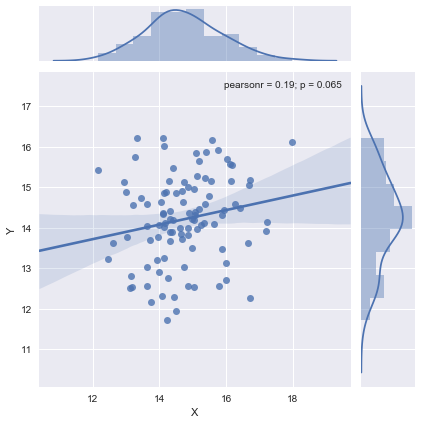

Генерируется выборка из нормального распределения с mu = 11.0, 8.6; sigma = 4.6
вариант 10     ----------------------------------------
           X       Y
Средние: 11.80    9.20
ст.откл: 4.30    4.44
99-процентный доверительный интервал X: ( 10.78, 12.82 )
99-процентный доверительный интервал Y: ( 8.15, 10.25 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 4.20; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.45 значим (p-value = 2.39444e-06).


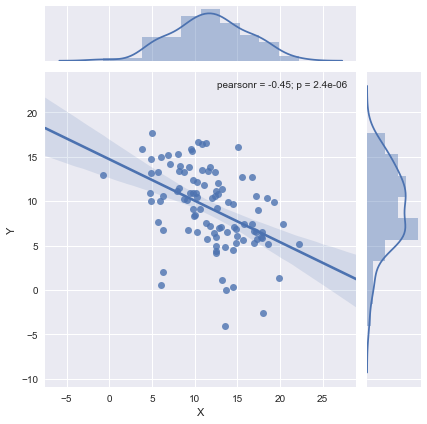

Генерируется выборка из нормального распределения с mu = 7.1, 14.6; sigma = 5.1
вариант 11     ----------------------------------------
           X       Y
Средние: 7.96    15.64
ст.откл: 5.44    4.66
99-процентный доверительный интервал X: ( 6.67, 9.24 )
99-процентный доверительный интервал Y: ( 14.54, 16.74 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.17; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -10.73; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.22 не значим (p-value = 0.0305884).


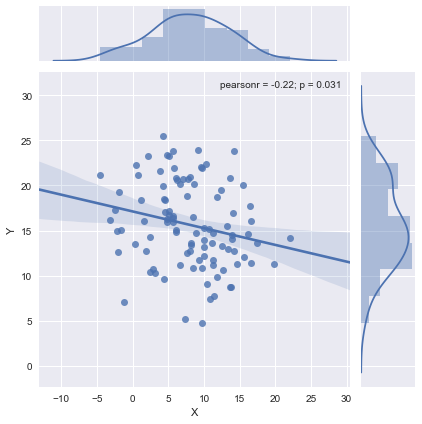

Генерируется выборка из нормального распределения с mu = 8.7, 13.3; sigma = 5.4
вариант 12     ----------------------------------------
           X       Y
Средние: 8.58    13.69
ст.откл: 5.10    5.32
99-процентный доверительный интервал X: ( 7.38, 9.79 )
99-процентный доверительный интервал Y: ( 12.43, 14.95 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.04; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -6.93; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.64 значим (p-value = 7.63663e-13).


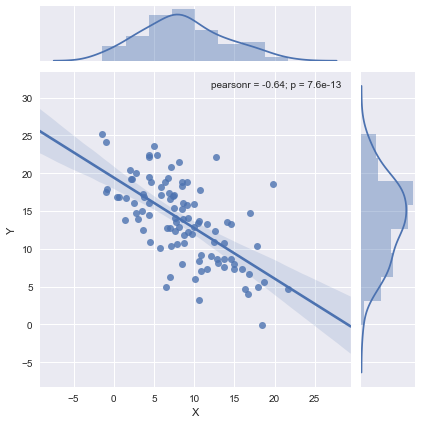

Генерируется выборка из нормального распределения с mu = 11.5, 9.7; sigma = 3.2
вариант 13     ----------------------------------------
           X       Y
Средние: 11.48    9.29
ст.откл: 3.42    3.25
99-процентный доверительный интервал X: ( 10.68, 12.29 )
99-процентный доверительный интервал Y: ( 8.52, 10.05 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.05; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 4.66; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.10 не значим (p-value = 0.327763).


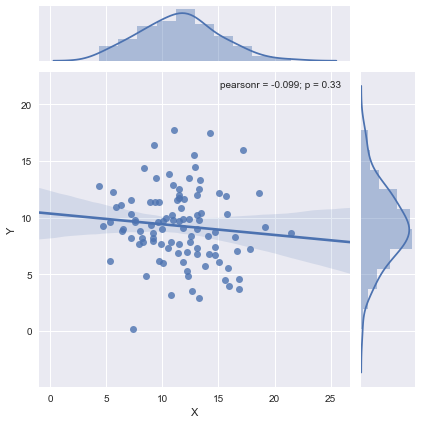

Генерируется выборка из нормального распределения с mu = 15.6, 11.5; sigma = 2.5
вариант 14     ----------------------------------------
           X       Y
Средние: 15.92    11.73
ст.откл: 2.19    2.58
99-процентный доверительный интервал X: ( 15.40, 16.44 )
99-процентный доверительный интервал Y: ( 11.12, 12.34 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.18; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 12.37; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.53 значим (p-value = 1.41276e-08).


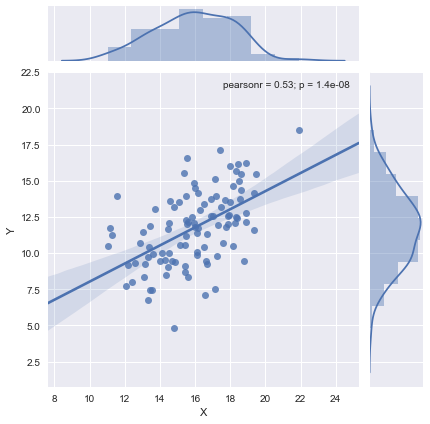

Генерируется выборка из нормального распределения с mu = 8.4, 10.0; sigma = 2.5
вариант 15     ----------------------------------------
           X       Y
Средние: 8.57    10.21
ст.откл: 2.71    2.52
99-процентный доверительный интервал X: ( 7.93, 9.21 )
99-процентный доверительный интервал Y: ( 9.61, 10.80 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.08; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -4.44; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.13 не значим (p-value = 0.203467).


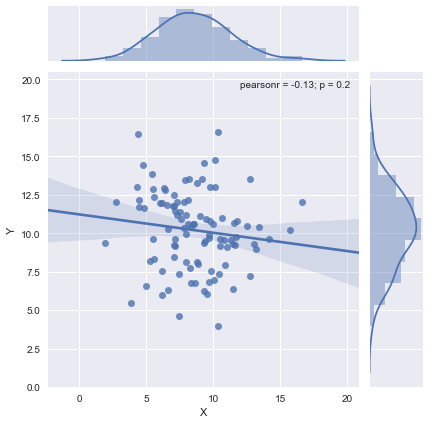

Генерируется выборка из нормального распределения с mu = 9.1, 8.4; sigma = 4.8
вариант 16     ----------------------------------------
           X       Y
Средние: 9.33    9.59
ст.откл: 4.38    4.49
99-процентный доверительный интервал X: ( 8.29, 10.37 )
99-процентный доверительный интервал Y: ( 8.52, 10.65 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = -0.41; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.40 значим (p-value = 3.84117e-05).


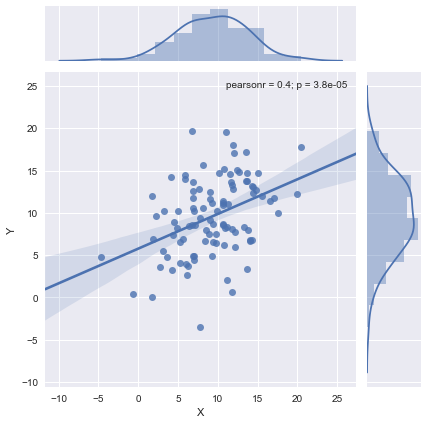

Генерируется выборка из нормального распределения с mu = 13.4, 8.5; sigma = 1.7
вариант 17     ----------------------------------------
           X       Y
Средние: 13.35    8.70
ст.откл: 1.54    1.68
99-процентный доверительный интервал X: ( 12.99, 13.72 )
99-процентный доверительный интервал Y: ( 8.30, 9.10 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.09; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 20.46; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.04 не значим (p-value = 0.687509).


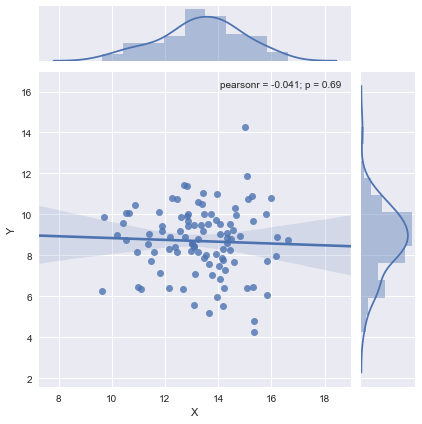

Генерируется выборка из нормального распределения с mu = 9.8, 7.7; sigma = 5.6
вариант 18     ----------------------------------------
           X       Y
Средние: 9.18    7.69
ст.откл: 5.93    6.05
99-процентный доверительный интервал X: ( 7.78, 10.59 )
99-процентный доверительный интервал Y: ( 6.26, 9.12 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.02; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = 1.76; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.29 значим (p-value = 0.00294493).


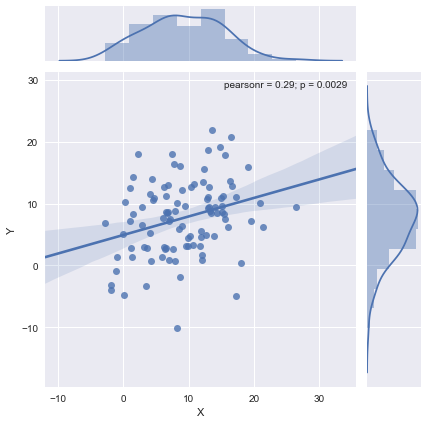

Генерируется выборка из нормального распределения с mu = 9.1, 11.6; sigma = 3.0
вариант 19     ----------------------------------------
           X       Y
Средние: 8.81    11.99
ст.откл: 2.89    2.46
99-процентный доверительный интервал X: ( 8.12, 9.49 )
99-процентный доверительный интервал Y: ( 11.41, 12.57 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.18; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -8.38; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.54 значим (p-value = 9.22777e-09).


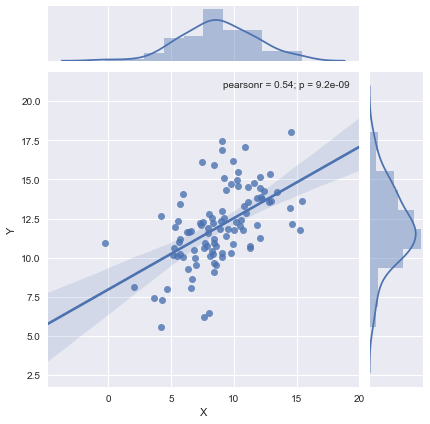

Генерируется выборка из нормального распределения с mu = 8.2, 12.6; sigma = 5.0
вариант 20     ----------------------------------------
           X       Y
Средние: 8.63    12.39
ст.откл: 5.21    5.29
99-процентный доверительный интервал X: ( 7.40, 9.87 )
99-процентный доверительный интервал Y: ( 11.13, 13.64 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -5.05; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.19 не значим (p-value = 0.0649371).


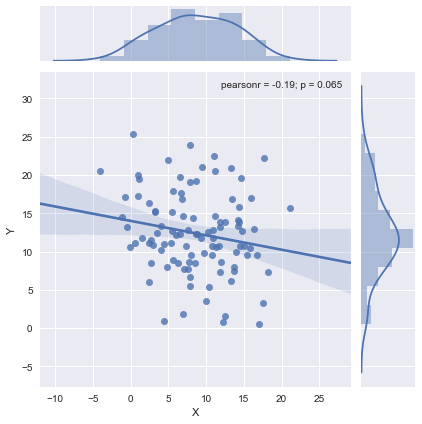

Генерируется выборка из нормального распределения с mu = 15.9, 9.9; sigma = 1.2
вариант 21     ----------------------------------------
           X       Y
Средние: 15.82    9.81
ст.откл: 1.12    1.36
99-процентный доверительный интервал X: ( 15.55, 16.08 )
99-процентный доверительный интервал Y: ( 9.49, 10.14 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.21; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = 34.04; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.54 значим (p-value = 7.88355e-09).


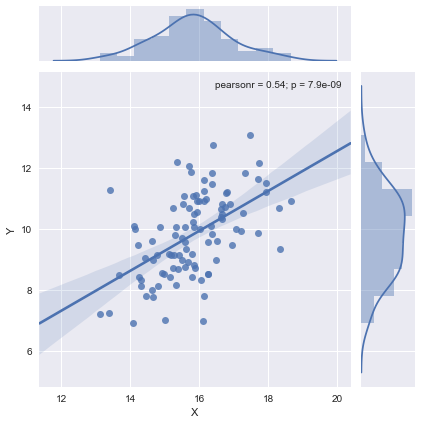

Генерируется выборка из нормального распределения с mu = 11.7, 16.0; sigma = 5.7
вариант 22     ----------------------------------------
           X       Y
Средние: 11.32    16.09
ст.откл: 6.47    6.40
99-процентный доверительный интервал X: ( 9.79, 12.85 )
99-процентный доверительный интервал Y: ( 14.58, 17.61 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -5.24; tk = ±2.60 )
Коэффициент корреляции Пирсона r = 0.23 не значим (p-value = 0.0186325).


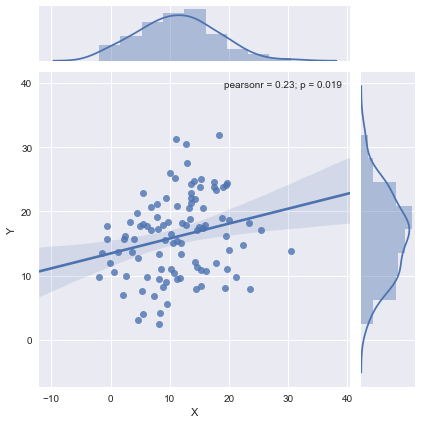

Генерируется выборка из нормального распределения с mu = 9.5, 14.7; sigma = 2.5
вариант 23     ----------------------------------------
           X       Y
Средние: 9.27    14.76
ст.откл: 2.71    2.52
99-процентный доверительный интервал X: ( 8.63, 9.91 )
99-процентный доверительный интервал Y: ( 14.16, 15.35 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.07; fk = ±1.69 )
Гипотеза о равенстве средних: отклоняется ( tn = -14.80; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.22 не значим (p-value = 0.0305092).


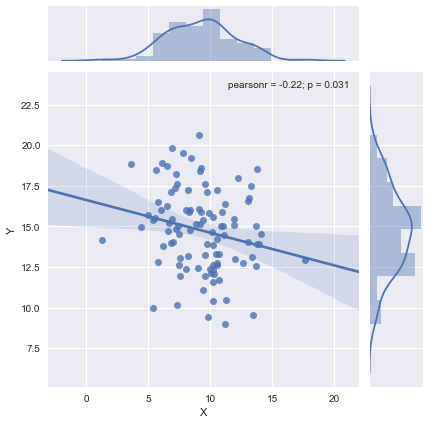

Генерируется выборка из нормального распределения с mu = 14.2, 14.1; sigma = 3.6
вариант 24     ----------------------------------------
           X       Y
Средние: 14.78    13.75
ст.откл: 3.50    3.71
99-процентный доверительный интервал X: ( 13.95, 15.60 )
99-процентный доверительный интервал Y: ( 12.87, 14.62 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.06; fk = ±1.69 )
Гипотеза о равенстве средних: принимается ( tn = 2.02; tk = ±2.60 )
Коэффициент корреляции Пирсона r = -0.19 не значим (p-value = 0.0607693).


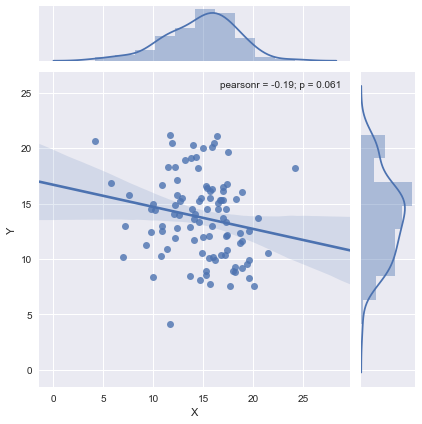

In [11]:
# генерируются данные

def gen_data():
    N = 100
    mu1 = round(6+random()*10,1)
    mu2 = round(6+random()*10,1)
    sigma = round(1+random()*5,1)
    print("Генерируется выборка из нормального распределения с mu = %2.1f, %2.1f; sigma = %2.1f" % (mu1, mu2, sigma))
    X = [round(gauss(mu1, sigma),2) for i in range(100)]
    Y = [round(gauss(mu2, sigma),2) for i in range(100)]
    
    if random()<0.5:
        for i in range(20, choice([50, 80, 250])):
            j = randint(0, len(X)-2)
            if X[j]>X[j+1]: X[j:j+2] = X[j:j+2][::-1]
            if Y[j]<Y[j+1]: Y[j:j+2] = Y[j:j+2][::-1]
    else:
        for i in range(20, choice([50, 80, 250])):
            j = randint(0, len(X)-2)
            if X[j]>X[j+1]: X[j:j+2] = X[j:j+2][::-1]
            if Y[j]>Y[j+1]: Y[j:j+2] = Y[j:j+2][::-1]
            
        
    XY = pd.DataFrame({'X': X, 'Y':Y})
    return XY

def print_data(d):
    X = d.X
    Y = d.Y
#     suptitle("X", size=16)
#     sb.distplot(X)
#     show()
#     suptitle("Y", size=16)
#     sb.distplot(Y)
#     show()
    describe2(X,Y,alpha,True)
    sb.jointplot(x='X', y='Y', data = d, kind='reg')
    show()
    

for j in range(1,25):
    XY = gen_data()
    print("вариант {1}     ".format(i,j)+"--"*20)
    print_data(XY)
#         XY.to_csv('CYC12-%i-V%0.2i.csv' % (i,j), sep=';', cols=['X', 'Y'])